<a href="https://colab.research.google.com/github/andreibonifacio/API-youtube/blob/main/API_Youtube.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from IPython.display import YouTubeVideo

In [4]:
!pip install --upgrade google-api-python-client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 32.6 MB/s eta 0:00:00
  Attempting uninstall: google-auth-httplib2
    Found existing installation: google-auth-httplib2 0.1.1
    Uninstalling google-auth-httplib2-0.1.1:
      Successfully uninstalled google-auth-httplib2-0.1.1
  Attempting uninstall: google-api-python-client
    Found existing installation: google-api-python-client 2.84.0
    Uninstalling google-api-python-client-2.84.0:
      Successfully uninstalled google-api-python-client-2.84.0


In [53]:
from googleapiclient.discovery import build
youTubeApiKey="-----------------"
youtube = build('youtube','v3', developerKey=youTubeApiKey)

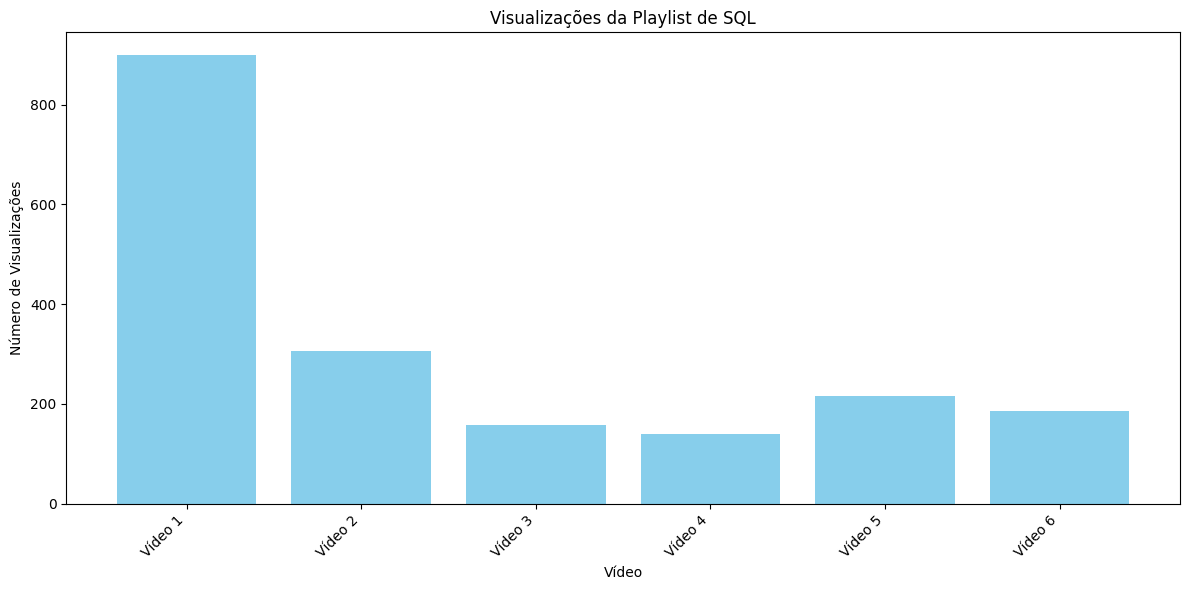

In [64]:
import matplotlib.pyplot as plt
from googleapiclient.discovery import build

def obter_numero_visualizacoes(playlist_id):
    visualizacoes_por_video = []
    playlist_videos = youtube.playlistItems().list(part='snippet',playlistId=playlist_id,maxResults=50).execute()
    for item in playlist_videos['items']:
        video_id = item['snippet']['resourceId']['videoId']
        video_statistics = youtube.videos().list(part='statistics',id=video_id).execute()
        view_count = int(video_statistics['items'][0]['statistics']['viewCount'])
        visualizacoes_por_video.append(view_count)

    return visualizacoes_por_video

def grafico(visualizacoes_por_video):
    labels = [f"Vídeo {i+1}" for i in range(len(visualizacoes_por_video))]

    values = visualizacoes_por_video

    plt.figure(figsize=(12, 6))
    plt.bar(labels, values, color='skyblue')
    plt.xlabel('Vídeo')
    plt.ylabel('Número de Visualizações')
    plt.title('Visualizações da Playlist de SQL')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def main():
    playlist_id = "PLiJqHBsOKi2f6ibhVJFmfK2x7YYwoNXy-"
    visualizacoes_por_video = obter_numero_visualizacoes(playlist_id)
    grafico(visualizacoes_por_video)

if __name__ == "__main__":
    main()

# Função para retornar o gráfico de qualquer snippet ou statistic
# Correlações